In [1]:
%%bash
wget -O auto.csv -c https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original 
wget -O README -c https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names 

--2019-05-09 23:33:16--  https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original
Resolviendo archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Conectando con archive.ics.uci.edu (archive.ics.uci.edu)[128.195.10.252]:443... conectado.
Petición HTTP enviada, esperando respuesta... 416 Requested Range Not Satisfiable

    El archivo ya se ha obtenido por completo; no hay nada que hacer.

--2019-05-09 23:33:17--  https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names
Resolviendo archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Conectando con archive.ics.uci.edu (archive.ics.uci.edu)[128.195.10.252]:443... conectado.
Petición HTTP enviada, esperando respuesta... 416 Requested Range Not Satisfiable

    El archivo ya se ha obtenido por completo; no hay nada que hacer.



### Información preliminar

1. Use las herramientas de UNIX para leer el archivo README en el notebook
1. Responda ¿Cuántos y cuáles son los atributos (características)? ¿De qué tipo es cada uno?
1. Responda ¿Cuantas instancias/ejemplos existen?


In [2]:
%%bash
cat README

1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumptio

Los atributos de README tiene una cantidad de 9, los cuales estan descritos en la siguiente tabla los cuales estan enumerados, seguidos por su tipo:
       
    1. mpg:           continuo
    2. cylinders:     multivariable discreta
    3. displacement:  continuo
    4. horsepower:    continuo
    5. weight:        continuo
    6. acceleration:  continuo
    7. model year:    multivariable discreta
    8. origin:        multivariable  discreta
    9. car name:      string (unico para cada instancia)


La cantidad de instancias es: 398

### Lectura de datos

1. Cree un `DataFrame` a partir de `auto.csv` 
    1. Use una columna por atributo* 
    1. Use los nombres de columna descritos en `README` 
1. Imprima las primeras 5 filas del dataframe

**HINT:** Verifique el uso  del argumento `delim_whitespace`*

In [3]:
!head auto.csv

18.0   8.   307.0      130.0      3504.      12.0   70.  1.	"chevrolet chevelle malibu"
15.0   8.   350.0      165.0      3693.      11.5   70.  1.	"buick skylark 320"
18.0   8.   318.0      150.0      3436.      11.0   70.  1.	"plymouth satellite"
16.0   8.   304.0      150.0      3433.      12.0   70.  1.	"amc rebel sst"
17.0   8.   302.0      140.0      3449.      10.5   70.  1.	"ford torino"
15.0   8.   429.0      198.0      4341.      10.0   70.  1.	"ford galaxie 500"
14.0   8.   454.0      220.0      4354.       9.0   70.  1.	"chevrolet impala"
14.0   8.   440.0      215.0      4312.       8.5   70.  1.	"plymouth fury iii"
14.0   8.   455.0      225.0      4425.      10.0   70.  1.	"pontiac catalina"
15.0   8.   390.0      190.0      3850.       8.5   70.  1.	"amc ambassador dpl"


In [4]:
import pandas as pd
print("Versión de pandas "+pd.__version__)
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.display import display

Versión de pandas 0.24.2


In [5]:
cabeceras=["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car name"]
df = pd.read_csv("auto.csv",delim_whitespace=True,names=cabeceras)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


### Manipulación de columnas 

1. Convierta las columnas *cylinders*, *year* y *origin* a valores enteros
1. Reemplace los valores $[1, 2, 3]$ de *origin* por *USA*, *Europe*, *Japan*, respectivamente
1. Convierta los valores de la columna *mpg* (galones por milla) a kmpl (kilómetros por litro)
1. Convierta los valores de la columna peso de libras (*pounds*) a kilogramos
1. Modifique el nombre de la columna *mpg* a kmpl


In [6]:
df= df.astype({"cylinders":int , "model year":int , "origin": int })
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


In [7]:
def cambianombre(x):
    if x==1:
        return "USA"
    if x==2:
        return "EUROPE"
    else:
        return "JAPAN"
    
def galakm(x):
    x= x*0.425144
    return x

def librasakm(k):
    k=k*0.453592
    return k

df["origin"] = df["origin"].apply(cambianombre)
df["mpg"] = df["mpg"].apply(galakm)
df["weight"] = df["weight"].apply(librasakm)
df=df.rename(columns = {'mpg':'kmpl'})

In [8]:
df.head()

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,7.652592,8,307.0,130.0,1589.386368,12.0,70,USA,chevrolet chevelle malibu
1,6.377160,8,350.0,165.0,1675.115256,11.5,70,USA,buick skylark 320
2,7.652592,8,318.0,150.0,1558.542112,11.0,70,USA,plymouth satellite
3,6.802304,8,304.0,150.0,1557.181336,12.0,70,USA,amc rebel sst
4,7.227448,8,302.0,140.0,1564.438808,10.5,70,USA,ford torino


### Datos perdidos

1. Encuentre los nombres de los autos que tengan valores perdidos (*missing data*)
1. Encuentre los nombres de los atributos que tengan valores perdidos
1. Elimines las filas con atributos perdidos ¿Cuántas filas quedan en el dataframe?

In [9]:
x= df[df.isna().any(axis=1)]
autosnan = x['car name']

print("Los autos que poseen valores NaN son:\n")
print(autosnan)

Los autos que poseen valores NaN son:

10                 citroen ds-21 pallas
11     chevrolet chevelle concours (sw)
12                     ford torino (sw)
13              plymouth satellite (sw)
14                   amc rebel sst (sw)
17                ford mustang boss 302
38                           ford pinto
39          volkswagen super beetle 117
133                       ford maverick
337                renault lecar deluxe
343                  ford mustang cobra
361                         renault 18i
367                           saab 900s
382                      amc concord dl
Name: car name, dtype: object


In [10]:
atributosnan = df.isna().any(axis=0)
print("Los atributos que poseen valores NaN son:\n")
print(atributosnan[atributosnan])

Los atributos que poseen valores NaN son:

kmpl          True
horsepower    True
dtype: bool


In [11]:
df=df.dropna(axis=0,how='any')
len(df[:])

392

En el date frame quedan después de eliminar las filas nan: 392 filas

### Multi-índice

1. Cree un dataframe con dos columnas a partir del atributo "*car name*"
    1. La primera columna debe tener la primera palabra del string en *car name**
    1. La segunda columna debe tener el resto del string en *car name*
1. Elimine la columna *car name* del dataframe y agregue estas nuevas columnas llamándolas *brand* y *model*, respectivamente
1. ¿Cuántas marcas (*brand*) únicas existan? ¿Existen columnas repetidas o mal escritas? Mencione cuales y corrijalas**
1. Cree un multi-índice que utilice como primera llave a *brand* y como segunda a *model*
1. Muestre los autos con marca *Mazda*
1. Usando groupby cuente la cantidad de modelos por marca

**HINT:** Verifique el uso de `.str.split()`* y `str.replace()`**

In [12]:
def remplazapalabra1(x):
    listadepalabras=x.split()
    x=listadepalabras[0]
    return x

def remplazarpalabraresto(x):
    listadepalabras=x.split()
    listarecortada=listadepalabras[1:]
    x=' '.join(listarecortada)
    return x

df3 = pd.DataFrame(columns=['brand', 'model'])
df3['brand']=df['car name']
df3['model']=df['car name']
df3["brand"]=df3["brand"].apply(remplazapalabra1)
df3["model"]=df3["model"].apply(remplazarpalabraresto)
df3.head()

,brand,model
0,chevrolet,chevelle malibu
1,buick,skylark 320
2,plymouth,satellite
3,amc,rebel sst
4,ford,torino


In [13]:
df=df.drop(['car name'], axis=1)

In [14]:
df=pd.concat([df, df3], axis=1)
df.head()

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,model
0,7.652592,8,307.0,130.0,1589.386368,12.0,70,USA,chevrolet,chevelle malibu
1,6.377160,8,350.0,165.0,1675.115256,11.5,70,USA,buick,skylark 320
2,7.652592,8,318.0,150.0,1558.542112,11.0,70,USA,plymouth,satellite
3,6.802304,8,304.0,150.0,1557.181336,12.0,70,USA,amc,rebel sst
4,7.227448,8,302.0,140.0,1564.438808,10.5,70,USA,ford,torino


In [15]:
listaunica=df["brand"].unique()
unicos=' - '.join(listaunica)
print("Las marcas unicas que existen en brand son: \n")
print(unicos)

Las marcas unicas que existen en brand son: 

chevrolet - buick - plymouth - amc - ford - pontiac - dodge - toyota - datsun - volkswagen - peugeot - audi - saab - bmw - chevy - hi - mercury - opel - fiat - oldsmobile - chrysler - mazda - volvo - renault - toyouta - maxda - honda - subaru - chevroelt - capri - vw - mercedes-benz - cadillac - mercedes - vokswagen - triumph - nissan


Por lo tanto existen 30 marcas unicas existentes, ya que existen 5 marcas, las cuales estan mal escritas o repetidas.

Las marcas que estan repetidas o mal escritas son:

chevroelt= chevrolet = chevy

vokswagen=volkswagen

vw=bmw

maxda=mazda

mercedes=mercedes-benz

toyouta=toyota

In [16]:
df = df.replace({'vw': 'bmw','vokswagen': 'volkswagen','chevy': 'chevrolet','chevroelt': 'chevrolet','maxda': 'mazda','mercedes': 'mercedes-benz','toyouta': 'toyota'})
df.head()

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,model
0,7.652592,8,307.0,130.0,1589.386368,12.0,70,USA,chevrolet,chevelle malibu
1,6.377160,8,350.0,165.0,1675.115256,11.5,70,USA,buick,skylark 320
2,7.652592,8,318.0,150.0,1558.542112,11.0,70,USA,plymouth,satellite
3,6.802304,8,304.0,150.0,1557.181336,12.0,70,USA,amc,rebel sst
4,7.227448,8,302.0,140.0,1564.438808,10.5,70,USA,ford,torino


In [17]:
df=df.set_index(['brand', 'model'])
df.sort_index(inplace=True)
df.head()

kmpl  cylinders  displacement  horsepower  \
brand model                                                                 
amc   ambassador brougham   5.526872          8         360.0       175.0   
      ambassador dpl        6.377160          8         390.0       190.0   
      ambassador sst        7.227448          8         304.0       150.0   
      concord               8.247794          6         232.0        90.0   
      concord              10.330999          4         151.0        90.0   

                                weight  acceleration  model year origin  
brand model                                                              
amc   ambassador brougham  1733.175032          11.0          73    USA  
      ambassador dpl       1746.329200           8.5          70    USA  
      ambassador sst       1665.589824          11.5          72    USA  
      concord              1456.030320          17.2          78    USA  
      concord              1362.136776          20.1          80    USA

In [18]:
df.loc[("mazda" ), :]

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model year,origin
model,,,,,,,,
626,13.307007,4,120.0,75.0,1153.030864,17.5,80,JAPAN
626,13.434550,4,120.0,74.0,1195.214920,18.3,81,JAPAN
glc,19.811710,4,86.0,65.0,957.079120,17.9,80,JAPAN
glc 4,14.497410,4,91.0,68.0,900.380120,16.0,81,JAPAN
glc custom,13.179464,4,91.0,68.0,893.576240,17.6,82,JAPAN
glc custom l,15.730328,4,91.0,68.0,918.523800,18.2,82,JAPAN
glc deluxe,13.944723,4,78.0,52.0,900.380120,19.4,78,JAPAN
glc deluxe,14.497410,4,86.0,65.0,895.844200,15.2,79,JAPAN
rx-4,9.140596,3,80.0,110.0,1233.770240,13.5,77,JAPAN


In [19]:
df.groupby(["brand"]).size()


brand
amc              27
audi              7
bmw               8
buick            17
cadillac          2
capri             1
chevrolet        47
chrysler          6
datsun           23
dodge            28
fiat              8
ford             48
hi                1
honda            13
mazda            12
mercedes-benz     3
mercury          11
nissan            1
oldsmobile       10
opel              4
peugeot           8
plymouth         31
pontiac          16
renault           3
saab              4
subaru            4
toyota           26
triumph           1
volkswagen       16
volvo             6
dtype: int64

### Buscando autos

1. Por cada marca encuentre el auto más antiguo y el más nuevo
1. Por cada marca encuentre el auto más pesado y el más liviano
1. Por cada marca encuentre los autos con mayor y menor caballos de fuerza, respectivamente
1. Por cada marca encuentre los autos con menor y mayor desempeño en términos de kmpl, respectivamente

In [20]:
print("El auto mas antiguo por cada marca es: ")
df_max_value = df[df['model year'] == df.groupby('brand')['model year'].transform('min')]
df_max_value.loc[:,['model year']]

El auto mas antiguo por cada marca es: 


model year
brand         model                        
amc           ambassador dpl             70
              gremlin                    70
              hornet                     70
              rebel sst                  70
audi          100 ls                     70
bmw           2002                       70
buick         estate wagon (sw)          70
              skylark 320                70
cadillac      seville                    76
capri         ii                         76
chevrolet     c20                        70
              chevelle malibu            70
              impala                     70
              monte carlo                70
chrysler      newport royal              72
datsun        pl510                      70
dodge         challenger se              70
              d200                       70
fiat          124b                       71
ford          f250                       70
              galaxie 500                70
              maverick                   70
              torino                     70
hi            1200d                      70
honda         civic                      74
mazda         rx2 coupe                  72
mercedes-benz 280s                       76
mercury       capri 2000                 71
nissan        stanza xe                  82
oldsmobile    delta 88 royale            72
opel          1900                       71
peugeot       504                        70
plymouth      'cuda 340                  70
              duster                     70
              fury iii                   70
              satellite                  70
pontiac       catalina                   70
renault       12 (sw)                    72
saab          99e                        70
subaru                                   74
toyota        corona mark ii             70
triumph       tr7 coupe                  80
volkswagen    1131 deluxe sedan          70
volvo         145e (sw)                  72

In [21]:
print("El auto mas nuevo por cada marca es:")
df_min_value = df[df['model year'] == df.groupby('brand')['model year'].transform('max')]
df_min_value.loc[:,['model year']]

El auto mas nuevo por cada marca es:


model year
brand         model                             
amc           concord                         80
audi          4000                            80
              5000s (diesel)                  80
bmw           pickup                          82
buick         century limited                 82
cadillac      eldorado                        79
capri         ii                              76
chevrolet     camaro                          82
              cavalier                        82
              cavalier 2-door                 82
              cavalier wagon                  82
              s-10                            82
chrysler      lebaron medallion               82
datsun        310 gx                          82
dodge         aries se                        82
              charger 2.2                     82
              rampage                         82
fiat          strada custom                   79
ford          fairmont futura                 82
              granada l                       82
              mustang gl                      82
              ranger                          82
hi            1200d                           70
honda         accord                          82
              civic                           82
              civic (auto)                    82
mazda         glc custom                      82
              glc custom l                    82
mercedes-benz 240d                            80
mercury       lynx l                          82
nissan        stanza xe                       82
oldsmobile    cutlass ciera (diesel)          82
opel          1900                            76
peugeot       505s turbo diesel               81
plymouth      horizon miser                   82
pontiac       j2000 se hatchback              82
              phoenix                         82
renault       5 gtl                           77
saab          99gle                           78
subaru                                        81
toyota        celica gt                       82
              corolla                         82
triumph       tr7 coupe                       80
volkswagen    rabbit l                        82
volvo         diesel                          81

In [22]:
print("El auto mas pesado por cada marca es: ")
df_max_value = df[df['weight'] == df.groupby('brand')['weight'].transform('max')]
df_max_value.loc[:,['weight']]

El auto mas pesado por cada marca es: 


,,weight
brand,model,
amc,matador (sw),1930.941144
audi,5000s (diesel),1338.096400
bmw,320i,1179.339200
buick,electra 225 custom,2245.733992
cadillac,seville,1986.732960
capri,ii,1166.638624
chevrolet,impala,2266.599224
chrysler,new yorker brougham,2147.758120
datsun,810 maxima,1329.024560


In [23]:
print("El auto con mas caballos de fuera por cada marca es: ")
df_max_value = df[df['horsepower'] == df.groupby('brand')['horsepower'].transform('max')]
df_max_value.loc[:,['horsepower']]

El auto con mas caballos de fuera por cada marca es: 


horsepower
brand         model                          
amc           ambassador dpl            190.0
audi          5000                      103.0
bmw           2002                      113.0
buick         electra 225 custom        225.0
              estate wagon (sw)         225.0
cadillac      seville                   180.0
capri         ii                         92.0
chevrolet     impala                    220.0
chrysler      new yorker brougham       215.0
datsun        280-zx                    132.0
dodge         d200                      210.0
fiat          124 sport coupe            90.0
ford          f250                      215.0
hi            1200d                     193.0
honda         civic                      97.0
mazda         rx-4                      110.0
mercedes-benz 280s                      120.0
mercury       marquis                   208.0
nissan        stanza xe                  88.0
oldsmobile    omega                     180.0
              vista cruiser             180.0
opel          1900                       90.0
peugeot       604sl                     133.0
plymouth      fury iii                  215.0
pontiac       grand prix                230.0
renault       12tl                       83.0
saab          99gle                     115.0
              99le                      115.0
subaru                                   93.0
toyota        mark ii                   122.0
triumph       tr7 coupe                  88.0
volkswagen    dasher                     78.0
              rabbit custom              78.0
volvo         264gl                     125.0

In [24]:
print("El auto con menos caballos de fuera por cada marca es: ")
df_max_value = df[df['horsepower'] == df.groupby('brand')['horsepower'].transform('min')]
df_max_value.loc[:,['horsepower']]

El auto con menos caballos de fuera por cada marca es: 


horsepower
brand         model                             
amc           spirit dl                     80.0
audi          5000s (diesel)                67.0
bmw           dasher (diesel)               48.0
              rabbit c (diesel)             48.0
buick         opel isuzu deluxe             80.0
cadillac      eldorado                     125.0
capri         ii                            92.0
chevrolet     chevette                      52.0
chrysler      lebaron salon                 85.0
datsun        710                           61.0
dodge         colt                          75.0
              omni                          75.0
fiat          128                           49.0
ford          escort 2h                     65.0
              escort 4w                     65.0
hi            1200d                        193.0
honda         civic                         53.0
              civic cvcc                    53.0
mazda         glc deluxe                    52.0
mercedes-benz 240d                          67.0
mercury       lynx l                        70.0
nissan        stanza xe                     88.0
oldsmobile    cutlass ciera (diesel)        85.0
              starfire sx                   85.0
opel          manta                         75.0
peugeot       304                           70.0
plymouth      horizon 4                     63.0
              horizon miser                 63.0
pontiac       astro                         78.0
renault       5 gtl                         58.0
saab          99e                           95.0
subaru                                      67.0
              dl                            67.0
              dl                            67.0
toyota        corona                        52.0
triumph       tr7 coupe                     88.0
volkswagen    1131 deluxe sedan             46.0
              super beetle                  46.0
volvo         diesel                        76.0

In [25]:
print("El auto con menos desempeño en kmpl por cada marca es: ")
df_max_value = df[df['kmpl'] == df.groupby('brand')['kmpl'].transform('min')]
df_max_value.loc[:,['kmpl']]

El auto con menos desempeño en kmpl por cada marca es: 


kmpl
brand         model                         
amc           ambassador brougham   5.526872
audi          100ls                 8.502880
bmw           320i                  9.140596
buick         electra 225 custom    5.101728
cadillac      seville               7.014876
capri         ii                   10.628600
chevrolet     c20                   4.251440
chrysler      new yorker brougham   5.526872
              newport royal         5.526872
datsun        610                   9.353168
              810                   9.353168
dodge         d200                  4.676584
fiat          128                  10.203456
ford          f250                  4.251440
hi            1200d                 3.826296
honda         civic                10.203456
mazda         rx3                   7.652592
mercedes-benz 280s                  7.014876
mercury       marquis               4.676584
nissan        stanza xe            15.305184
oldsmobile    omega                 4.676584
opel          manta                10.203456
peugeot       604sl                 6.887333
plymouth      custom suburb         5.526872
              volare premier v8     5.526872
pontiac       safari (sw)           5.526872
renault       12 (sw)              11.053744
saab          99gle                 9.183110
subaru                             11.053744
toyota        mark ii               8.077736
triumph       tr7 coupe            14.880040
volkswagen    411 (sw)              9.353168
volvo         264gl                 7.227448

### Análisis exploratorio

1. Encuentre el promedio y la desviación estándar de cada atributo numérico en toda la tabla y por marca
1. Construya gráficos de barras del rendimiento (kmpl) promedio en función del año, peso, origen,  número de cilindros y marca (use *barras de error* con la desviación estándar del rendimiento)
1. Viendo estos gráficos, ¿Qué puede concluir respecto a la relación del rendimiento con estos factores?

In [26]:
ddf = df.groupby(["brand"]).agg(['std', 'mean'])
ddf.head()

kmpl            cylinders           displacement              \
               std       mean       std      mean          std        mean   
brand                                                                        
amc       1.371242   7.682510  1.154701  6.444444    56.839656  253.851852   
audi      2.819918  11.357418  0.487950  4.285714    12.253279  111.857143   
bmw       3.899291  14.965069  0.000000  4.000000    13.700886   99.500000   
buick     2.449252   8.155262  1.504894  6.470588   103.366140  272.941176   
cadillac  1.954044   8.396594  0.000000  8.000000     0.000000  350.000000   

         horsepower                  weight              acceleration  \
                std        mean         std         mean          std   
brand                                                                   
amc       29.431557  114.703704  206.571831  1492.200082     2.730006   
audi      11.842217   86.714286  132.877537  1159.445951     1.946670   
bmw       25.856748   73.500000   99.955561   985.995610     5.129119   
buick     45.098585  136.411765  354.438685  1611.772467     2.581666   
cadillac  38.890873  152.500000  153.954230  1877.870880     3.747666   

                    model year             
               mean        std       mean  
brand                                      
amc       15.070370   3.012793  74.000000  
audi      15.942857   3.773340  75.714286  
bmw       17.275000   3.741657  78.000000  
buick     14.700000   3.756367  76.117647  
cadillac  14.750000   2.121320  77.500000

In [27]:
import warnings
warnings.filterwarnings("ignore")

#Preparando los valores que tendran que estar en grafico
#datos para años
avg_kpl_year=df.groupby("model year").mean()["kmpl"]
std_kpl_year=df.groupby("model year").std()["kmpl"]
arrayyearavg=avg_kpl_year.values
arrayyearstd=std_kpl_year.values
std_kpl_year_valoresdex = avg_kpl_year.index.values

#datos para pesos
avg_kpl_weight=df.groupby("weight").mean()["kmpl"]
std_kpl_weight=df.groupby("weight").std()["kmpl"]
arrayweightavg=avg_kpl_weight.values
arrayweightstd=std_kpl_weight.values
std_kpl_weight_valoresdex = avg_kpl_weight.index.values

#datos para origen
avg_kpl_origin=df.groupby("origin").mean()["kmpl"]
std_kpl_origin=df.groupby("origin").std()["kmpl"]
arrayoriginavg=avg_kpl_origin.values
arrayoriginstd=std_kpl_origin.values
std_kpl_origin_valoresdex = avg_kpl_origin.index.values

#datos para cylinders
avg_kpl_cylinders=df.groupby("cylinders").mean()["kmpl"]
std_kpl_cylinders=df.groupby("cylinders").std()["kmpl"]
arraycylindersavg=avg_kpl_cylinders.values
arraycylindersstd=std_kpl_cylinders.values
std_kpl_cylinders_valoresdex = avg_kpl_cylinders.index.values

#datos para marcas
avg_kpl_brand=df.groupby("brand").mean()["kmpl"]
std_kpl_brand=df.groupby("brand").std()["kmpl"]
arraybrandavg=avg_kpl_brand.values
arraybrandstd=std_kpl_brand.values
std_kpl_brand_valoresdex = avg_kpl_brand.index.values


<IPython.core.display.Javascript object>


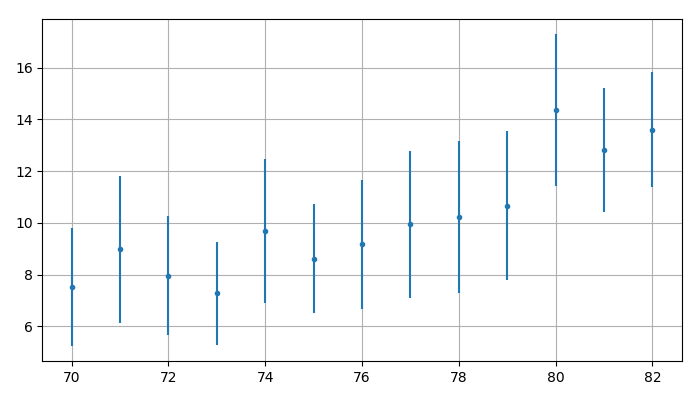

<Container object of 3 artists>

In [35]:
#grafico para model year
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.grid()
x = np.linspace(-2, 2, num=21)
ax.errorbar(std_kpl_year_valoresdex, arrayyearavg, yerr=arrayyearstd, fmt='.', elinewidth=None, ecolor=None, capsize=None)

<IPython.core.display.Javascript object>


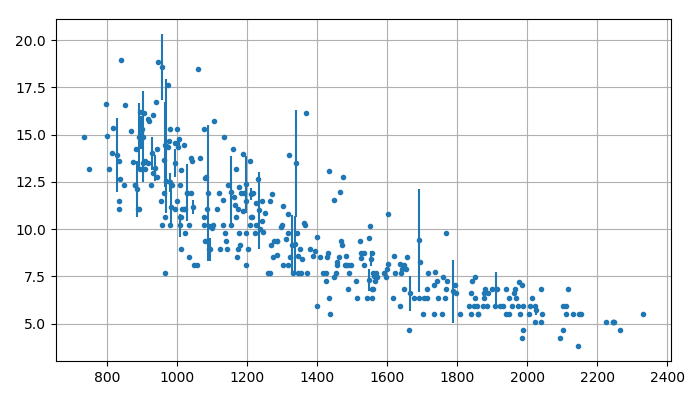

<Container object of 3 artists>

In [36]:
#grafico para weight
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.grid()
x = np.linspace(-2, 2, num=21)
ax.errorbar(std_kpl_weight_valoresdex, arrayweightavg, yerr=arrayweightstd, fmt='.', elinewidth=None, ecolor=None, capsize=None)

<IPython.core.display.Javascript object>


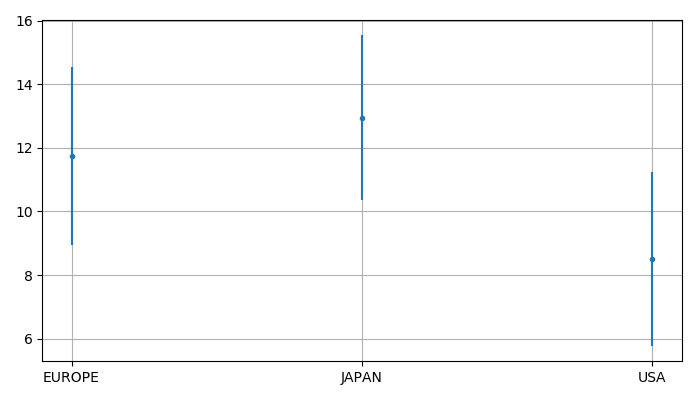

<Container object of 3 artists>

In [37]:
#grafico para origin
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.grid()
x = np.linspace(-2, 2, num=21)
ax.errorbar(std_kpl_origin_valoresdex, arrayoriginavg, yerr=arrayoriginstd, fmt='.', elinewidth=None, ecolor=None, capsize=None)

<IPython.core.display.Javascript object>


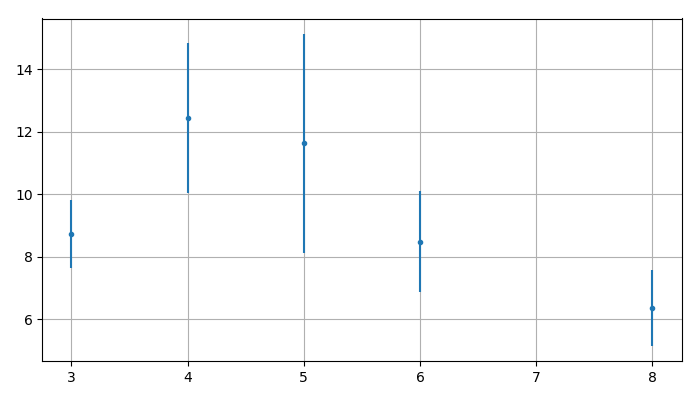

<Container object of 3 artists>

In [38]:
#grafico para cylinders
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.grid()
x = np.linspace(-2, 2, num=21)
ax.errorbar(std_kpl_cylinders_valoresdex, arraycylindersavg, yerr=arraycylindersstd, fmt='.', elinewidth=None, ecolor=None, capsize=None)

<IPython.core.display.Javascript object>


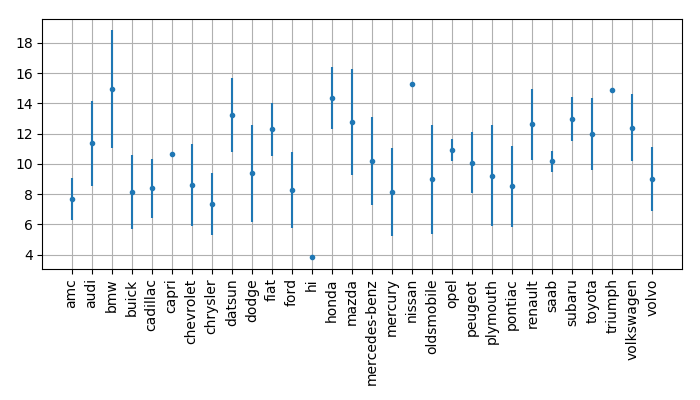

<Container object of 3 artists>

In [39]:
#grafico para marcas
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.grid()
x = np.linspace(-2, 2, num=21)
plt.xticks(rotation=90)
ax.errorbar(std_kpl_brand_valoresdex, arraybrandavg, yerr=arraybrandstd, fmt='.', elinewidth=None, ecolor=None, capsize=None)

Concluciones de graficos:

En conclución respecto al gráfico de los años respecto a los kmpl, se puede apreciar que entre mas nuevo es el auto, mayor es su rendimiento respecto a los autos antiguos.

En conclución respecto al gráfico de los pesos respecto a los kmpl, se puede apreciar que los autos mas pesados tienen un mejor rendimiento, respecto a los autos menos pesados.

En conclución respecto al gráfico a los paises, se puede apreciar que los autos en rendimiento esta en un orden de mayor a menor, la cual es: japón, europa, usa.

En conclución respecto al gráfico de las cilindros respecto a los kmpl, se puede apreciar que los autos que poseen menos cilindros poseen un mayor rendimiento, pero al tener 3 cilindros, es su rendimiento baja como si fuese un auto que tubiese 6 cilindros.

En conclución respecto al gráfico de las marcas, se puede apreciar que los autos nissan tienen el mejor rendimiento y el peor lo tiene los auto de marca hi.

### Gráficos interactivos

1. Construya una interfaz gráfica usando `ipywidgets` que permita seleccionar dos atributos y los gráfique como un *scatter plot*
    1. El primer atributo será el eje de abscisas y el segundo atributo el eje de ordenadas
    1. Ese el atributo de origen como el color de los marcadores
1. Los gráficos deben ser legibles, los ejes deben estar etiquetados, use leyenda para los marcadores

<IPython.core.display.Javascript object>


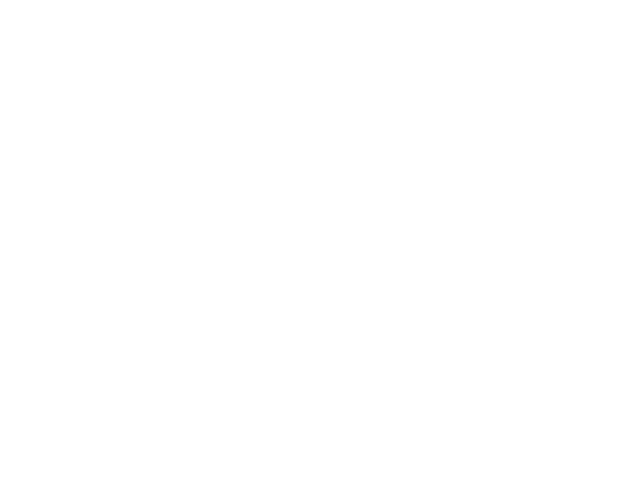

In [33]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

def on_change(nuevax):
    global x
    global y
    x=df[nuevax["new"]]
    graficar(x,y)

def on_change2(nuevay):
    global x
    global y
    y=df[nuevay["new"]]
    graficar(x,y)
    
def graficar(x,y):
    global groups
    global fig
    fig.clear()
    ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
    for index in ['Europe', 'Japan', 'USA']:
        var=df.loc[df["origin"]==index]
        ax.scatter(x, y, marker=None, s=None, c=None,label=index, alpha=1.) 
    plt.title('Matplot scatter plot')
    plt.show()
    
x= df["kmpl"]
y= df["kmpl"]
fig = plt.figure()
groups=["kmpl","weight","origin","cylinders","model year","displacement","horsepower"]
sel_slider = widgets.Dropdown(description="Eje x:", 
                              options=groups)
sel_slider_2 = widgets.Dropdown(description="Ejey:", 
                              options=groups)
graficar(x,y)
display(sel_slider)
display(sel_slider_2)
sel_slider.observe(on_change, names='value')
sel_slider_2.observe(on_change2, names='value')

<IPython.core.display.Javascript object>


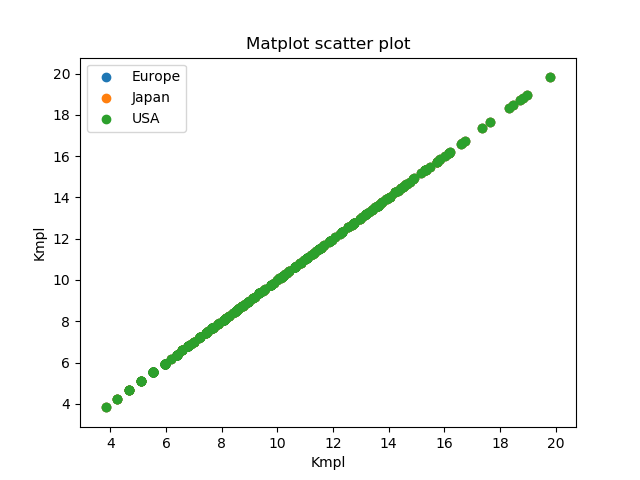

In [34]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

def on_change(nuevax):
    global x
    global y
    global nombreejex
    global nombreejey
    x=df[nuevax["new"]]
    nombreejex=nuevax["new"]
    graficar(x,y,nombreejex,nombreejey)

def on_change2(nuevay):
    global x
    global y
    global nombreejex
    global nombreejey
    y=df[nuevay["new"]]
    nombreejey=nuevay["new"]
    graficar(x,y,nombreejex,nombreejey)
    
def graficar(x,y,nx,ny):
    global groups
    global fig
    fig.clear()
    ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
    for index in ['Europe', 'Japan', 'USA']:
        var=df.loc[df["origin"]==index]
        ax.scatter(x,y, marker=None, s=None, c=None,label=index, alpha=1.) 
    plt.title('Matplot scatter plot')
    plt.legend(loc=2)
    plt.xlabel(nx)  
    plt.ylabel(ny) 
    plt.show()
    
x= df["kmpl"]
y= df["kmpl"]
nombreejex="Kmpl"
nombreejey="Kmpl"
fig = plt.figure()
groups=["kmpl","weight","origin","cylinders","model year","displacement","horsepower"]
sel_slider = widgets.Dropdown(description="Eje x:", 
                              options=groups)
sel_slider_2 = widgets.Dropdown(description="Ejey:", 
                              options=groups)
graficar(x,y,nombreejex,nombreejey)
display(sel_slider)
display(sel_slider_2)
sel_slider.observe(on_change, names='value')
sel_slider_2.observe(on_change2, names='value')